# Chapter 3 Part 3 Exercises

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
from IPython.display import SVG, display

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [5]:
az.style.use('arviz-darkgrid')

## Question 11
***

Below are all four datasets from Anscombe's Quartert  
![title](images/640px-Anscombe.png)

### Question: When the exercise says "think about a model that fits teh first three datasets" does that mean a model for each plot, or one model that will handle all thre?

### Question: is this approach a good idea?
For the last dataset there seems to be two distinct patterns, a cluster of points at x=8 and one at x=19.

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/anscombe.csv")
df[["x4", "y4"]]

,x4,y4
0,8,6.58
1,8,5.76
2,8,7.71
3,8,8.84
4,8,8.47
5,8,7.04
6,8,5.25
7,19,12.50
8,8,5.56
9,8,7.91


In [21]:
# idx = df["x4"] > 8
x_vals = df["x4"].values

In [32]:
with pm.Model() as anscombe:
    
    # Two groups of points with independent parameters
    sd_8 = pm.HalfNormal("sd_8", sd=10)
    sd_19 = pm.HalfNormal("sd_19", sd=10)
    mu_8 = pm.Normal("mu_8", sd=10)
    mu_19 = pm.Normal("mu_19", sd=10)
    
    # Probability of being in each group
    group_prob = pm.Uniform("group_prob", 0, 1)
    group = pm.Bernoulli("group", group_prob)
    x_val = pm.Deterministic("x_val", 11*group + 8)
    
    # Distribution parameters depending on group
    sd = pm.math.switch(x_val > 8, sd_8, sd_19)
    mu = pm.math.switch(x_val > 8, mu_8, mu_19)
    
    y = pm.Normal("y", mu=mu, sd=sd, observed=df["y4"].values)
    trace_4 = pm.sample(draws=10000)
    ppc = pm.sample_posterior_predictive(trace_4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [group_prob, mu_19, mu_8, sd_19, sd_8]
>BinaryGibbsMetropolis: [group]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:15<00:00, 2753.90draws/s]
There were 385 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.910598587697831, but should be close to 0.8. Try to increase the number of tuning steps.
There were 438 divergences after tuning. Increase `target_accept` or reparameterize.
There were 905 divergences after tuning. Increase `target_accept` or reparameterize.
There were 513 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████| 40000/40000 [00:16<00:00, 2423.67it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff216a62e80>,
      dtype=object)

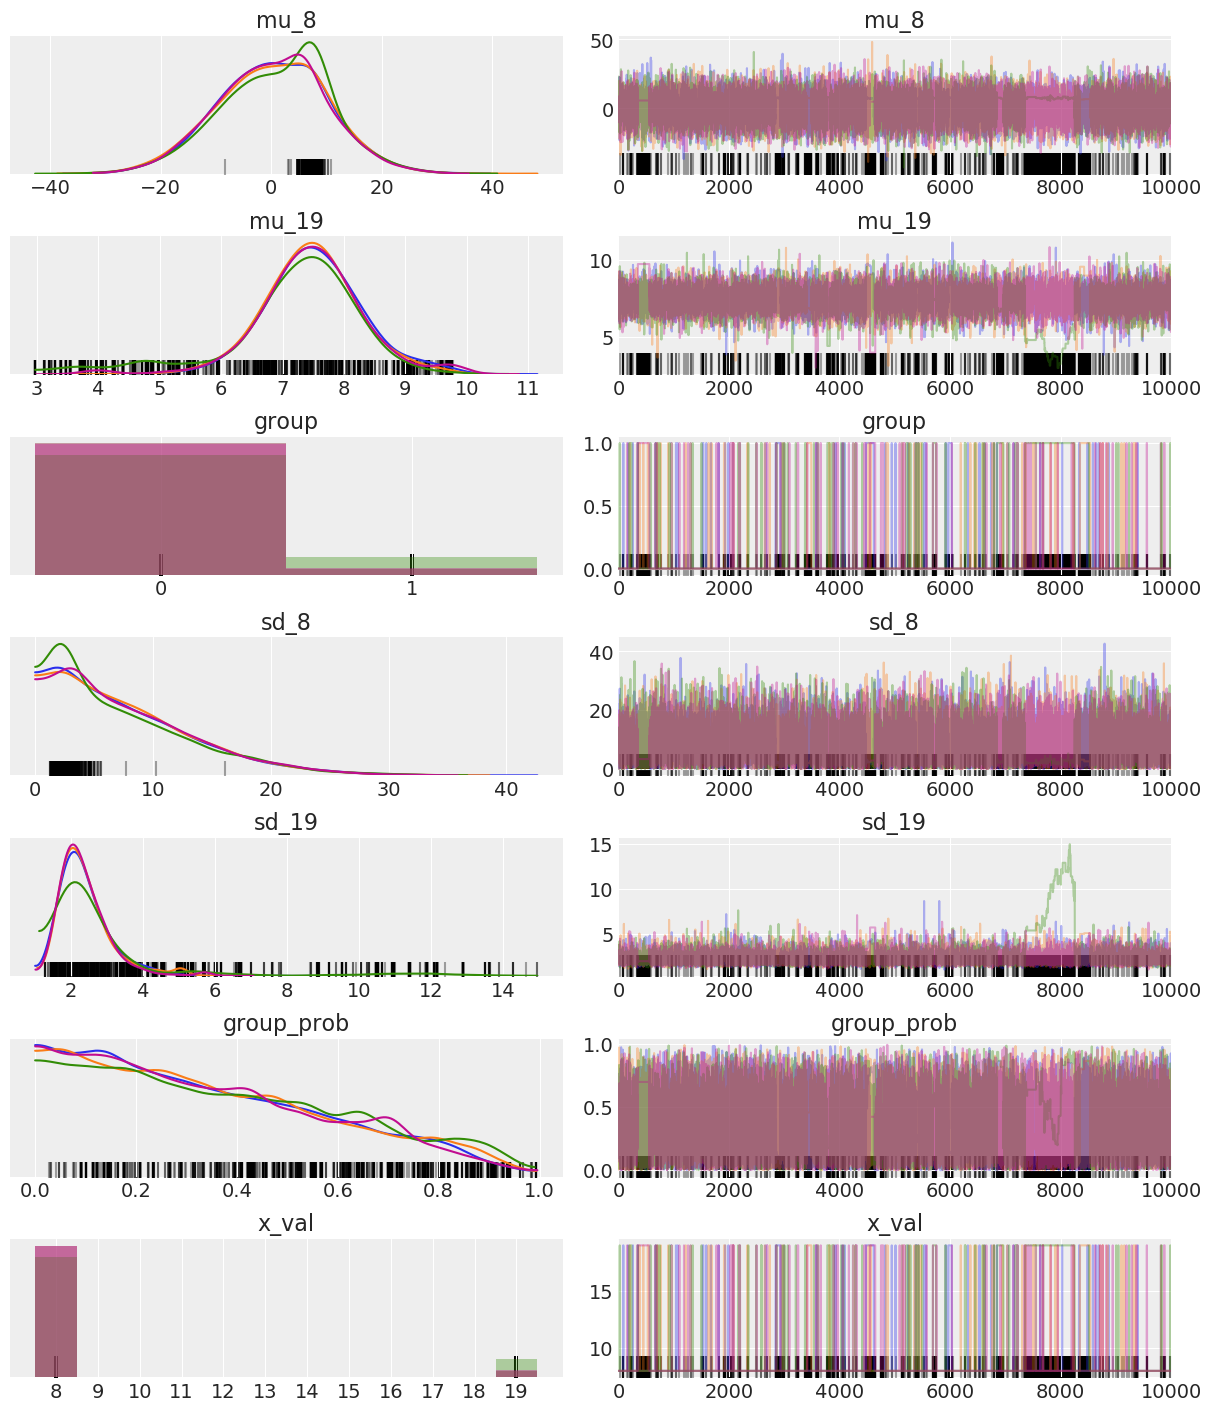

In [33]:
az.plot_trace(trace_4)

In [58]:
y_19 = ppc["y"][:,x_vals==19].flatten()
y_19.shape

(40000,)

In [55]:
y_8 = ppc["y"][:,x_vals==8].flatten()
y_8.shape

(400000,)

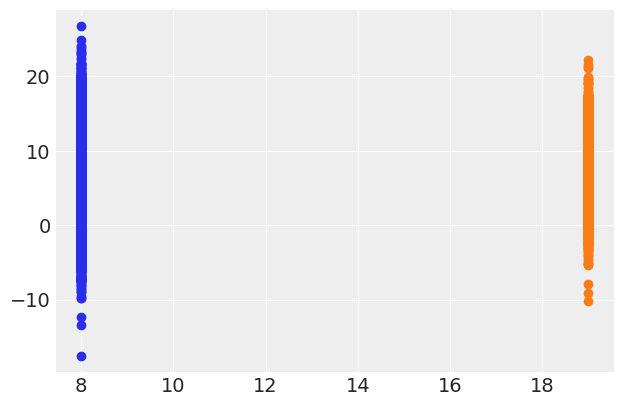

In [59]:
fig, ax = plt.subplots()
ax.scatter(8*np.ones(y_8.shape), y_8)
ax.scatter(19*np.ones(y_19.shape), y_19)